# Inversion

In what follows, we will implement inversion methods for sampling discrete and continuous distributions.

## Discrete distributions

**Example 2.1.** We think of our discrete distribution very practically as a vector defined on a set of states. Let us define a probability mass function on the set $\mathsf{S} = \{1, 2, 3, 4, 5\}$ as follows:
\begin{align*}
\mathsf{w} = \begin{bmatrix} 0.2 & 0.3 & 0.2 & 0.1 & 0.2 \end{bmatrix}
\end{align*}
Let us plot the PMF and CDF of this distribution.

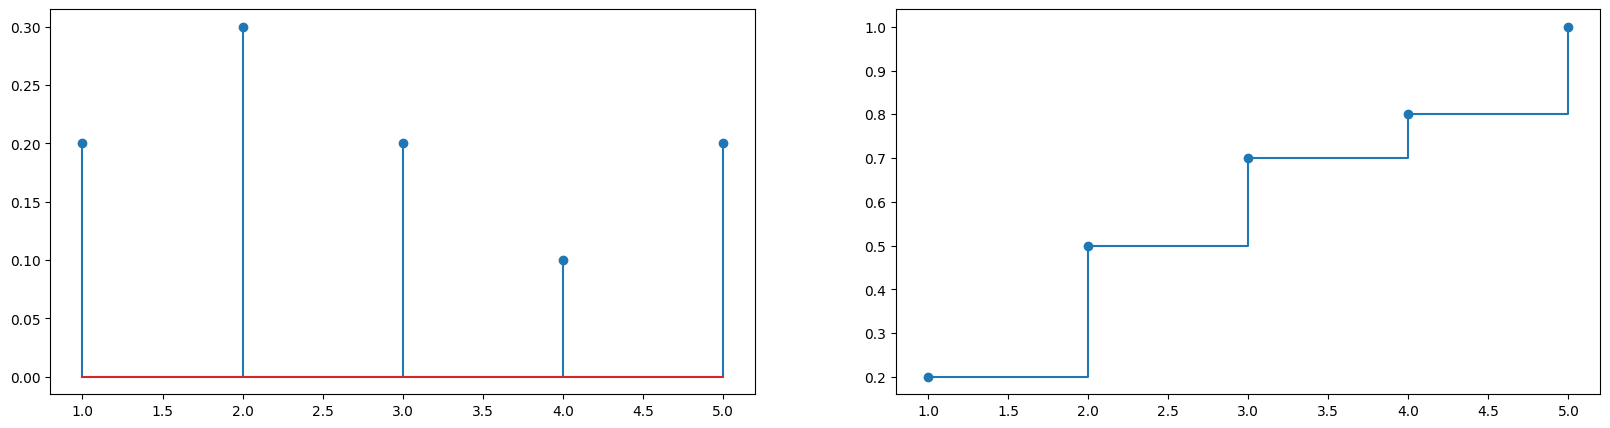

In [12]:
import numpy as np
import matplotlib.pyplot as plt

w = np.array([0.2, 0.3, 0.2, 0.1, 0.2])
s = np.array([1, 2, 3, 4, 5])

def discrete_cdf(w):
    return np.cumsum(w)

cw = discrete_cdf(w)

def plot_discrete_cdf(w, cw):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax[0].stem(s, w)
    ax[1].plot(s, cw, 'o-', drawstyle='steps-post')
    plt.show()

plot_discrete_cdf(w, cw)

Next, we can implement the sampling method using the inverse. Let us implement the method first, then look into some animations.

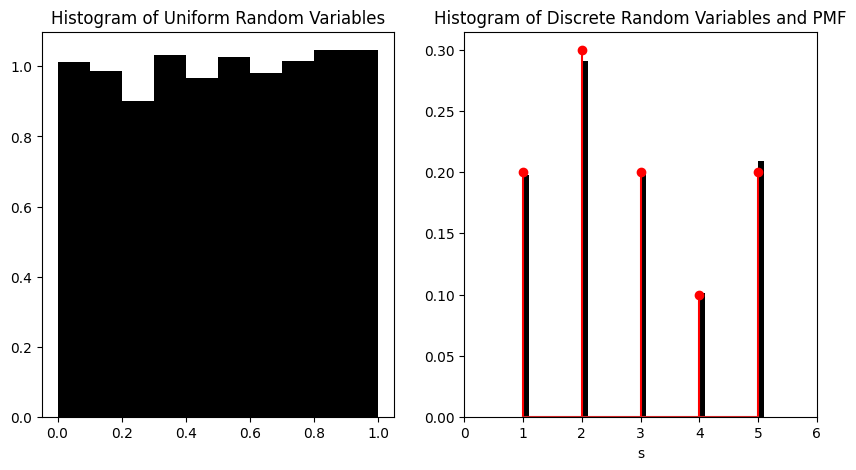

In [16]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(4)

w = np.array([0.2, 0.3, 0.2, 0.1, 0.2])
s = np.array([1, 2, 3, 4, 5])

def discrete_cdf(w):
    return np.cumsum(w)

def sample(u, s, w): # discrete sampler for a uniform random variable u, states s and weights w
    cdf = discrete_cdf(w)
    sample_ind = np.argmax(cdf > u)
    return s[sample_ind]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
n = 2000
x = []
cw = discrete_cdf(w)
un = []

for n in range(n):
    u = rng.uniform(0, 1)
    un.append(u)
    sample_x = sample(u, s, w)
    x.append(sample_x)

    # the rest is for animation

# plot the pmf using the stem function and change the color of the markers and the line
markerline, stemlines, baseline = ax[0].stem(s, w, markerfmt='o', linefmt='r-')
ax[0].cla()
ax[0].hist(un, bins=10, density=True, color='k', alpha=1)
ax[0].set_title("Histogram of Uniform Random Variables")

ax[1].cla()
ax[1].stem(s, w, markerfmt='o', linefmt='r-')
ax[1].set_xlabel("s")
# plot a histogram centered on states s
ax[1].hist(x, bins=range(7), density=True, color='k', alpha=1, align='mid', width=0.1)
ax[1].set_xlim([0, 6])
ax[1].set_title("Histogram of Discrete Random Variables and PMF")
plt.show()

As we can see, with $n = 2000$, the method samples from the correct distribution. Let us see below this process animated (the code is hidden as it has a lot of diversions from normal code for the sake of animation -- but feel free to expand if you are curious!).

In [17]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

rng = np.random.default_rng(4)

w = np.array([0.2, 0.3, 0.2, 0.1, 0.2])
s = np.array([1, 2, 3, 4, 5])

def discrete_cdf(w):
    return np.cumsum(w)

def sample(u, s, w): # discrete sampler for a uniform random variable u, states s and weights w
    cdf = discrete_cdf(w)
    sample_ind = np.argmax(cdf > u)
    return s[sample_ind]

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
n = 200
x = []
cw = discrete_cdf(w)
un = []

def update(i):
    global un, x
    u = rng.uniform(0, 1)
    un.append(u)
    sample_x = sample(u, s, w)
    x.append(sample_x)

    # the rest is for animation

    if i % 1 == 0:
        ax[0, 0].cla()
        # plot the pmf using the stem function and change the color of the markers and the line
        markerline, stemlines, baseline = ax[0, 0].stem(s, w, markerfmt='o', linefmt='r-')
        ax[0, 0].set_title("PMF")
        ax[0, 0].set_xlabel("s")
        # plot u in the y axis of ax[0, 1]
        ax[0, 1].cla()
        ax[0, 1].plot(s, cw, 'ro-', drawstyle='steps-post')
        ax[0, 1].set_title("Cumulative Distribution Function")
        ax[0, 1].set_xlabel("s")
        ax[0, 1].set_xlim([0, 6])
        ax[0, 1].set_ylim([0, 1])
        ax[0, 1].plot(0, u, c='k', marker='o', linestyle='none', markersize=10)
        ax[0, 1].plot(sample_x, u, c='k', marker='o', linestyle='none', markersize=10)
        ax[0, 1].plot([0, sample_x], [u, u], c=[0.8, 0, 0], linestyle='--')
        ax[0, 1].plot(sample_x, 0, c='k', marker='o', linestyle='none', markersize=10)

        ax[1, 0].cla()
        ax[1, 0].hist(un, bins=10, density=True, color='k', alpha=1)
        ax[1, 0].set_title("Histogram of Uniform Random Variables")

        ax[1, 1].cla()
        ax[1, 1].stem(s, w, markerfmt='o', linefmt='r-')
        ax[1, 1].set_xlabel("s")
        # plot a histogram centered on states s
        ax[1, 1].hist(x, bins=range(7), density=True, color='k', alpha=1, align='mid', width=0.1)
        ax[1, 1].set_xlim([0, 6])
        ax[1, 1].set_title("Histogram of Discrete Random Variables and PMF")


ani = FuncAnimation(fig, update, frames=n, repeat=False)
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

Of course the idea generalises to continuous distributions. Now let us demonstrate Example 2.2 of the lecture notes.

**Example 2.2.** In the lecture we have derived the sampler for exponential distribution:
\begin{align*}
p(x) = \text{Exp}(x;\lambda) = \lambda e^{-\lambda x}.
\end{align*}
We calculate the CDF
\begin{align*}
F_X(x) =& \int_{0}^x p(x') \mathrm{d} x', \\
=& \lambda \int_0^x e^{-\lambda x'} \mathrm{d} x', \\
=& {\lambda} \left[ -\frac{1}{\lambda} e^{- \lambda x'}\right]_{x' = 0}^x \\
=& 1 - e^{-\lambda x}.
\end{align*}
Deriving the inverse:
\begin{align*}
u =& 1 - e^{-\lambda x}\\
\implies x =& -\frac{1}{\lambda} \log (1 - u)\\
\implies F_X^{-1}(u) =& -\lambda^{-1} \log (1 - u).
\end{align*}
which gives us the sampler:
* Generate $u_i \sim \text{Unif}([0, 1])$
* $x_i = -\lambda^{-1} \log (1 - u_i)$.

Let us look at the code for this sampler.

Text(0.5, 1.0, 'Histogram of Exponentials')

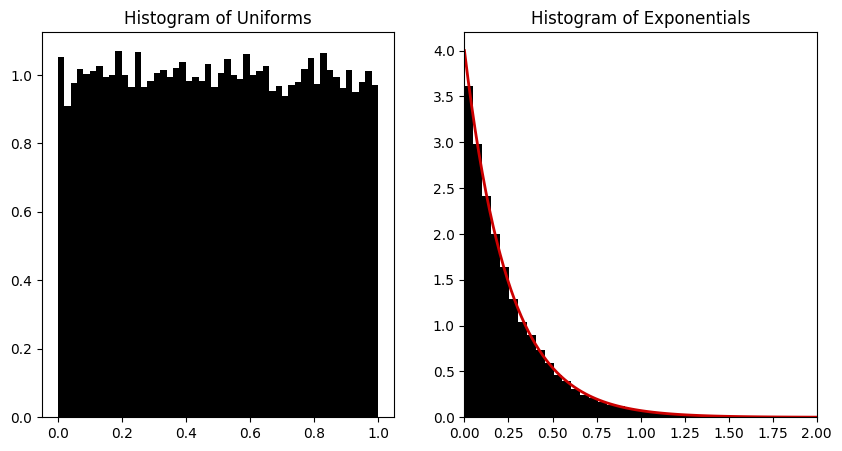

In [10]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(10)

def exponential_pdf(x, lam):
    return lam * np.exp(-lam * x)

def exponential_cdf(x, lam):
    return 1 - np.exp(-lam * x)

# an illustration of inverse transform sampling for the exponential distribution
# with parameter lambda = 4
lam = 4
N = 50000

x = np.array([])
un = []
for n in range(N):
    u = rng.uniform(0, 1)
    un.append(u)
    x = np.append(x, -np.log(1 - u) / lam)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# plot u on the y axis
xx = np.linspace(0, 2, 100)
axs[0].hist(un, bins=50, density=True, color='k')
axs[0].set_title("Histogram of Uniforms")
axs[1].hist(x, bins=50, density=True, color='k')
axs[1].plot(xx, exponential_pdf(xx, lam), color=[0.8, 0, 0], linewidth=2)
axs[1].set_xlim(0, 2)
axs[1].set_title("Histogram of Exponentials")
plt.show()

We can see that the sampler works as expected. Let us animate the process.

In [13]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

rng = np.random.default_rng(4)

def exponential_pdf(x, lam):
    return lam * np.exp(-lam * x)

def exponential_cdf(x, lam):
    return 1 - np.exp(-lam * x)

# an illustration of inverse transform sampling for the exponential distribution
# with parameter lambda = 4
lam = 4
N = 200

fig, axs = plt.subplots(2, 2, figsize=(7, 7), width_ratios=[1, 3], height_ratios=[3, 1])
x = np.array([])
un = []
def update(n):
    global un, x
    u = rng.uniform(0, 1)
    un.append(u)
    x = np.append(x, -np.log(1 - u) / lam)

    # print(x[n])
    if n % 1 == 0:
        # plot u on the y axis
        axs[0, 0].cla()
        axs[0, 1].cla()
        xx = np.linspace(0, 2, 100)
        axs[0, 1].plot(xx, exponential_cdf(xx, lam), color='k', linewidth=2)
        axs[0, 1].plot(0, u, 'o', color=[0.8, 0, 0], markersize=4)
        # plot the projection of u on the pdf
        axs[0, 1].plot(x[-1], u, 'o', color=[0.8, 0, 0], markersize=4)
        # plot a dashed line between the two points
        axs[0, 1].plot([0, x[-1]], [u, u], '--', color=[0.8, 0, 0], linewidth=2)
        axs[0, 1].plot([x[-1], x[-1]], [u, 0], '--', color=[0.8, 0, 0], linewidth=2)
        axs[0, 1].set_xlim(0, 2)
        axs[0, 1].set_ylim(0, 1)
        axs[0, 1].plot(x[-1], 0, 'o', color=[0.8, 0, 0], markersize=4)
        # plot on the axis on the left the histogram of un parallel to the y axis of the axs[0, 1] plot
        axs[0, 0].hist(un, bins=50, density=True, color='k', orientation=u'horizontal')
        axs[0, 0].set_ylim(0, 1)
        axs[0, 0].set_xlim(0, 1)
        axs[0, 0].invert_xaxis()
        axs[1, 1].cla()
        axs[1, 1].hist(x, bins=50, density=True, color='k')
        axs[1, 1].plot(xx, exponential_pdf(xx, lam), color=[0.8, 0, 0], linewidth=2)
        axs[1, 1].set_xlim(0, 2)
        # set horizontal orientation of the histogram on the right
        axs[1, 0].set_visible(False)

ani = FuncAnimation(fig, update, frames=N, repeat=False)
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

One can see above the animation of uniform sample being sampled and *going through* the inverse of the CDF which eventually becomes a sample from the exponential density.

Using these examples, you can practice to implement other inversion methods in lecture notes. A good idea is to animate other examples using the code above.